#### 理论证明
ReLU 函数是一个分段线性函数，具有凸性，能够提取非线性特征。  
通过适当的线性组合得到的神经网络，可以近似任何连续函数。  
经典的通用逼近定理（Hornik et al., 1989）证明：只要有足够的隐藏单元，一个具有非线性激活函数（如 sigmoid, tanh）的单隐层神经网络就可以逼近任何定义在紧致子集上的连续函数。  
后来，Montufar et al. (2014) 进一步分析了 ReLU 网络的表达能力，表明单隐藏层的 ReLU 网络可以划分输入空间，并在每个分区上拟合不同的线性函数，因此可以逼近任何连续函数。

#### 实验证明
这里用一个双层 ReLU 神经网络来拟合函数：y = sin(2πx)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(2 * np.pi * x)

In [ ]:
N_train = 100

# 训练数据
x_train = np.linspace(0, 1, 100).reshape(-1, 1)
y_train = f(x_train)

# 测试数据
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = f(x_test)

# 线性变化
x_train = (x_train - 0.5) * 2
x_test = (x_test - 0.5) * 2

print(x_train.shape)
print(x_test.shape)

(100, 1)
(100, 1)


In [4]:
input_dim = 1     # 输入维度
hidden_dim = 200   # 隐藏层神经元个数
output_dim = 1    # 输出维度

np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

In [5]:
class Relu:
    def __init__(self):
        self.mem = {}
        
    def forward(self, x):
        self.mem['x']=x
        return np.where(x > 0, x, np.zeros_like(x))
    
    def backward(self, grad_y):
        '''
        grad_y: same shape as x
        '''
        ####################
        '''计算relu 激活函数对应的梯度'''
        x = self.mem['x']
        grad_x = (x > 0).astype(np.float32) * grad_y
        ####################
        
        return grad_x

In [6]:
# 超参数设置
lr = 0.1
epochs = 7000

loss_history = []

relu = Relu()

# 训练过程（全批量梯度下降）
for epoch in range(epochs):
    # 前向传播
    z1 = np.dot(x_train, W1) + b1
    a1 = relu.forward(z1)                      
    
    # 输出层计算：z2 = a1 * W2 + b2
    z2 = np.dot(a1, W2) + b2             
    y_pred = z2 
    
    # 均方误差损失
    loss = np.mean((y_pred - y_train) ** 2)
    loss_history.append(loss)
    
    # 反向传播 
    dL_dz2 = 2 * (y_pred - y_train) / N_train
    
    # 参数 W2, a1, b2 的梯度
    dW2 = np.dot(a1.T, dL_dz2) 
    db2 = np.sum(dL_dz2, axis=0, keepdims=True)
    dL_da1 = np.dot(dL_dz2, W2.T)

    dL_dz1 = relu.backward(dL_da1)  # 利用ReLU的导数
    
    # 参数 W1, b1 的梯度
    dW1 = np.dot(x_train.T, dL_dz1)
    db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    
    # 更新参数
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    
    # 每100个epoch打印一次损失
    if epoch % 100 == 0:
        print("Epoch {}: loss = {:.5f}".format(epoch, loss))

Epoch 0: loss = 0.55008
Epoch 100: loss = 0.10910
Epoch 200: loss = 0.07262
Epoch 300: loss = 0.03946
Epoch 400: loss = 0.01920
Epoch 500: loss = 0.01013
Epoch 600: loss = 0.00629
Epoch 700: loss = 0.00443
Epoch 800: loss = 0.00342
Epoch 900: loss = 0.00283
Epoch 1000: loss = 0.00246
Epoch 1100: loss = 0.00223
Epoch 1200: loss = 0.00208
Epoch 1300: loss = 0.00194
Epoch 1400: loss = 0.00181
Epoch 1500: loss = 0.00173
Epoch 1600: loss = 0.00167
Epoch 1700: loss = 0.00163
Epoch 1800: loss = 0.00161
Epoch 1900: loss = 0.00158
Epoch 2000: loss = 0.00157
Epoch 2100: loss = 0.00155
Epoch 2200: loss = 0.00154
Epoch 2300: loss = 0.00153
Epoch 2400: loss = 0.00152
Epoch 2500: loss = 0.00151
Epoch 2600: loss = 0.00150
Epoch 2700: loss = 0.00149
Epoch 2800: loss = 0.00148
Epoch 2900: loss = 0.00147
Epoch 3000: loss = 0.00146
Epoch 3100: loss = 0.00144
Epoch 3200: loss = 0.00142
Epoch 3300: loss = 0.00141
Epoch 3400: loss = 0.00140
Epoch 3500: loss = 0.00139
Epoch 3600: loss = 0.00139
Epoch 3700: l

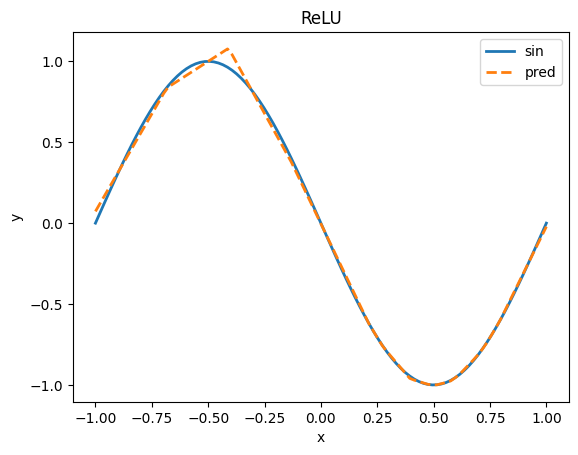

In [7]:
z1_test = np.dot(x_test, W1) + b1
a1_test = relu.forward(z1_test)
y_test_pred = np.dot(a1_test, W2) + b2

# 绘制真实函数与网络预测的对比图

plt.plot(x_test, y_test, label="sin", linewidth=2)
plt.plot(x_test, y_test_pred, label="pred", linestyle="--", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("ReLU")
plt.show()